<a href="https://colab.research.google.com/github/0ROHAN0/CMPE255_HW/blob/main/HW1_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1 Part 2: Preprocessing Bank Marketing Dataset

The original dataset is available here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
We have a modified subset of this dataset to practice data  preprocessing. 

Perform the following tasks on the provided bank marketing dataset (bank-hw1.csv contains the dataset and bank-names.txt contains the description of the original dataset). High pass and low pass specifications are on Canvas. Please note that ALL questions labelled [LP] must be completed satisfactorily to receive a low pass on the assignment. The [HP] question specifications combine all parts of the homework. Please refer to Canvas for more details.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[LP 1] Deal with the erroneous values in the dataset. 
[LP 2] Deal with the missing values in the dataset. 

Below is necessary information about the columns that contain missing and erroneous values:

1. Age: must be in the range 18-100 
2. Job: case insensitive field, column contains clerical errors where extra dots or punctuations are left in the entries 
3. Marital: marital status is case insensitive; short forms of the entries refer to the same value (e.g., div is the same as divorced); there are typographical errors in the entries
4. Day and month: some entries have both these values combined in one column 
5. Duration: all entries must be non-negative

The set of possible values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices even if you only took a guess. 



In [ ]:
## Your code for LP 1 goes here. 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
bank_dataframe = pd.read_csv('/content/drive/MyDrive/CMPE 255/CMPE 255/HW/HW1/Part2/bank-hw1.csv')
bank_dataframe.info()
bank_dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2251 non-null   int64  
 1   job        2247 non-null   object 
 2   marital    2251 non-null   object 
 3   education  2142 non-null   object 
 4   default    2251 non-null   object 
 5   balance    2251 non-null   int64  
 6   housing    2251 non-null   object 
 7   loan       2251 non-null   object 
 8   contact    2251 non-null   object 
 9   day        2248 non-null   object 
 10  month      2249 non-null   object 
 11  duration   2246 non-null   float64
 12  campaign   2249 non-null   float64
 13  pdays      2248 non-null   float64
 14  previous   2251 non-null   int64  
 15  poutcome   2162 non-null   object 
 16  y          2251 non-null   object 
dtypes: float64(3), int64(3), object(11)
memory usage: 299.1+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,47,management,married,tertiary,no,-315,yes,yes,cellular,27,aug,112.0,9.0,-1.0,0,unknown,no
1,42,management,married,tertiary,no,0,no,no,cellular,26,aug,179.0,16.0,-1.0,0,unknown,no
2,25,student,single,secondary,no,154,no,no,cellular,2,sep,382.0,1.0,183.0,3,success,yes
3,49,housemaid,divorced,secondary,no,267,no,no,telephone,9,feb,23.0,5.0,-1.0,0,unknown,no
4,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250.0,1.0,-1.0,0,unknown,no


In [ ]:
#Working on collumn Age
bank_dataframe = bank_dataframe[bank_dataframe['age'] <= 100]
bank_dataframe = bank_dataframe[bank_dataframe['age'] >= 18]


In [ ]:
bank_dataframe['job'].value_counts()

management       465
blue-collar      463
technician       381
admin            273
services         197
retired          111
entrepreneur      81
self-employed     77
housemaid         64
unemployed        57
student           54
unknown           18
None               1
Name: job, dtype: int64

In [ ]:
bank_dataframe['job'] = bank_dataframe['job'].replace(to_replace = 'admin.',value='admin')

In [ ]:
bank_dataframe['job'].value_counts()

management       465
blue-collar      463
technician       381
admin            273
services         197
retired          111
entrepreneur      81
self-employed     77
housemaid         64
unemployed        57
student           54
unknown           18
None               1
Name: job, dtype: int64

In [ ]:
mar_list = ['Married','maried','mairied','marirred','M']
mar_list_1 = ['Single','1']
mar_list_2 = ['div','Div']

bank_dataframe['marital'] = bank_dataframe['marital'].replace(to_replace = mar_list,value='married')
bank_dataframe['marital'] = bank_dataframe['marital'].replace(to_replace = mar_list_1,value='single')
bank_dataframe['marital'] = bank_dataframe['marital'].replace(to_replace = mar_list_2,value='divorced')

In [ ]:
aug_list = ['27-Aug','8-Aug','22-Aug','august','August']
bank_dataframe['month'] = bank_dataframe['month'].replace(to_replace = aug_list,value='aug')
bank_dataframe['month'] = bank_dataframe['month'].replace(to_replace = '28-Jul',value='jul')

In [ ]:
bank_dataframe['day'] = bank_dataframe['day'].replace(to_replace = '18-Nov',value=18)
bank_dataframe['day'] = bank_dataframe['day'].replace(to_replace = '5-Jun',value=5)

In [ ]:
#Working on column - duration
min(bank_dataframe['duration'])
#usingh min-max scaler, negative value will get fixed. (performed in LP4 too.)


-112.0

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(bank_dataframe[['duration']]))
# scaled_df

,0
0,0.065230
1,0.084741
2,0.143856
3,0.039313
4,0.105416
...,...
2246,0.059988
2247,0.064648
2248,0.086488
2249,0.050961


LP1: < Your explanation for LP 1 goes here >



LP2: < Your explanation for LP 2 goes here >

[LP 3] Use encoders and convert the categorical variables to numerical values.

In [ ]:
## Your code for LP 3 goes here. 

In [ ]:
# Taking New Dataframe
bank_cleaned_dataset = pd.DataFrame()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

bank_cleaned_dataset['job'] = label_encoding.fit_transform(bank_dataframe['job'])
bank_cleaned_dataset['marital'] = label_encoding.fit_transform(bank_dataframe['marital'])
bank_cleaned_dataset['education'] = label_encoding.fit_transform(bank_dataframe['education'])
bank_cleaned_dataset['default'] = label_encoding.fit_transform(bank_dataframe['default'])
bank_cleaned_dataset['housing'] = label_encoding.fit_transform(bank_dataframe['housing'])
bank_cleaned_dataset['loan'] = label_encoding.fit_transform(bank_dataframe['loan'])
bank_cleaned_dataset['contact'] = label_encoding.fit_transform(bank_dataframe['contact'])
bank_cleaned_dataset['month'] = label_encoding.fit_transform(bank_dataframe['month'])
bank_cleaned_dataset['poutcome'] = label_encoding.fit_transform(bank_dataframe['poutcome'])
bank_cleaned_dataset['y'] = label_encoding.fit_transform(bank_dataframe['y'])

[HP 1] Describe your choices to preprocess these columns and explain why they are appropriate for the column.

Encoding categorical column with label encoding as some columna are already in a binary data, on top of that, through label encoding we can process the dataset while having low diminsionality.




[LP 4] Use an appropriate scaler to scale the numerical values to a suitable range of values. Briefly explain the process you used.

In [ ]:
## Your code for LP 4 goes here. 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

bank_cleaned_dataset[['age','balance','day','duration','campaign','pdays','previous']] = min_max_scaler.fit_transform(bank_dataframe[['age','balance','day','duration','campaign','pdays','previous']])
bank_cleaned_dataset.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,6,10,2,0,1,1,0,2,2,0,0.153584,0.024163,0.866667,0.065230,0.163265,0.000000,0.000000
1,6,10,2,0,0,0,0,2,2,0,0.136519,0.029542,0.833333,0.084741,0.306122,0.000000,0.000000
2,10,11,1,0,0,0,0,12,1,1,0.078498,0.032172,0.033333,0.143856,0.000000,0.222491,0.081081
3,5,6,1,0,0,0,1,4,2,0,0.160410,0.034101,0.266667,0.039313,0.081633,0.000000,0.000000
4,3,11,0,0,1,0,2,9,2,0,0.078498,0.025768,0.733333,0.105416,0.000000,0.000000,0.000000


Save your clean dataset in a file called **bank_clean.csv**. Submit this file along with the ipynb solution file. 

In [ ]:
bank_cleaned_dataset.to_csv('bank_cleaned_dataset.data')

[HP 2] What is the average duration of calls made in the month of November? Plot a histogram of call duration in the month of November.

In [ ]:
## Your code for HP 2 goes here. 
sum_of_average_duration = sum(bank_dataframe[bank_dataframe['month']=='nov']['duration'])
length_of_sum = len(bank_dataframe[bank_dataframe['month']=='nov']['duration'])
print(sum_of_average_duration/length_of_sum)

287.8238636363636


Thus average duration of call in the month of number is 287.82 min as we see above.

In [ ]:
column_of_duration_day = bank_dataframe[bank_dataframe['month']=='nov'][['duration','day']]

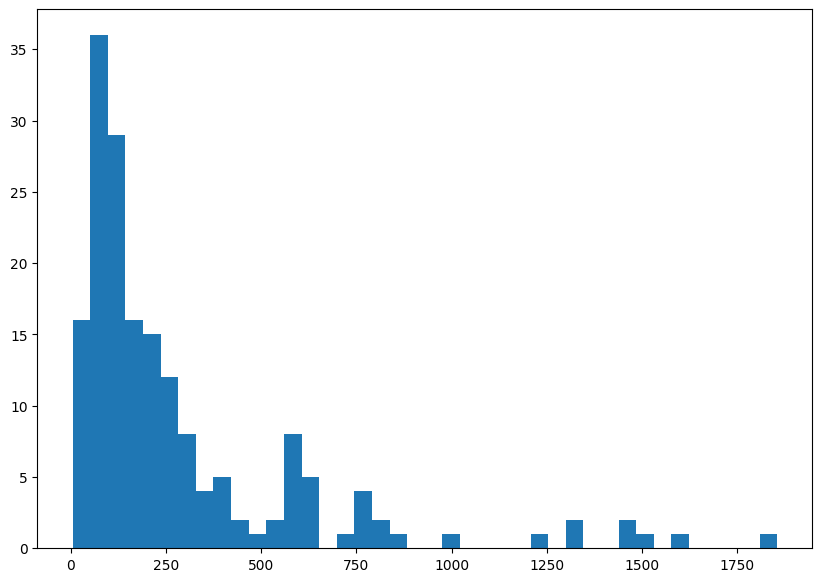

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(column_of_duration_day['duration'], bins = 40)
plt.show()

[HP 3] How many times on an average were customers whose "poutcome" was "success" contacted previously ("previous" column contains this information)? How does this compare to the customers whose "poutcome" was "failure" or "other"? What insight does this step provide for the business objective of having a successful campaign? 

In [ ]:
## Your code for HP 3 goes here. 
print("Value count: \n",bank_dataframe['poutcome'].value_counts(),end="     \n")
print("Sum of is not null: ",bank_dataframe['poutcome'].isna().sum())

Value count: 
 unknown    1831
failure     251
success      80
Name: poutcome, dtype: int64     
Sum of is not null:  89


In [ ]:
bank_cleaned_dataset.head(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,6,10,2,0,1,1,0,2,2,0,0.153584,0.024163,0.866667,0.065230,0.163265,0.000000,0.000000
1,6,10,2,0,0,0,0,2,2,0,0.136519,0.029542,0.833333,0.084741,0.306122,0.000000,0.000000
2,10,11,1,0,0,0,0,12,1,1,0.078498,0.032172,0.033333,0.143856,0.000000,0.222491,0.081081
3,5,6,1,0,0,0,1,4,2,0,0.160410,0.034101,0.266667,0.039313,0.081633,0.000000,0.000000
4,3,11,0,0,1,0,2,9,2,0,0.078498,0.025768,0.733333,0.105416,0.000000,0.000000,0.000000


In [ ]:
print("Previous is greater then 0: ",len(bank_cleaned_dataset[bank_cleaned_dataset['previous'] > 0]))
print("Total poutcome which is not null: ",bank_dataframe['poutcome'].isna().sum())

Previous is greater then 0:  421
Total poutcome which is not null:  89


The consumers whose outcome was "success" were contacted on average 2.759 times 
comparable with an unsuccessful attempt

In [ ]:
failed_previous_poutcome = pd.DataFrame(bank_dataframe[bank_dataframe['poutcome'] == 'failure']['previous'])
failed_previous_poutcome.head()
failed_prev_sum = failed_previous_poutcome['previous'].sum()
lenght = len(failed_previous_poutcome['previous'])
print(failed_prev_sum/lenght)

2.9840637450199203


With regard to the "outcome" feature, the average number of customers who were previously contacted and whose "outcome" was "success," according to the data provided, is 2.759.

There were typically 2.984 consumers who had previously been contacted "outcome" was "failure."

The ratio of "result" -> "success" vs. "failure" in terms of the people who were previously contacted is 0.924 times.

For "other," there isn't a value with the name "other."

# References
Include ALL your references here.

some you tube videos,
https://www.w3schools.com/python/pandas/default.asp
https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/#:~:text=StandardScaler%20follows%20Standard%20Normal%20Distribution,negative%20values%20in%20the%20dataset.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository
3. The bank_clean.csv file

